In [0]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145577&authkey=ADhTTaP_EXHvX0s"

--2019-04-29 09:20:45--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145577&authkey=ADhTTaP_EXHvX0s
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://lgr3dw.am.files.1drv.com/y4m4RkTWN_TDY_vqzsOq5tXfo3co9wxXvBXoPfDo1XNJpZ5vICOVK2Xb2fdOUjhSKWgn2hc0GeKl9nkp_KG2_Nz_yh-ylQqXxut4jiOJbqwngK18asd8V7dOqTFhrfm3gqOf0tsHN3QI0T16mp1uqDvfiachRGFVxCAcglW5m9OZZyup2q50yYZjZOabxzAaRrzO1DeA3_m0bcHxaB53pqHVQ/UFPR04.zip?download&psid=1 [following]
--2019-04-29 09:20:51--  https://lgr3dw.am.files.1drv.com/y4m4RkTWN_TDY_vqzsOq5tXfo3co9wxXvBXoPfDo1XNJpZ5vICOVK2Xb2fdOUjhSKWgn2hc0GeKl9nkp_KG2_Nz_yh-ylQqXxut4jiOJbqwngK18asd8V7dOqTFhrfm3gqOf0tsHN3QI0T16mp1uqDvfiachRGFVxCAcglW5m9OZZyup2q50yYZjZOabxzAaRrzO1DeA3_m0bcHxaB53pqHVQ/UFPR04.zip?download&psid=1
Resolving lgr3dw.am.files.1drv.com (lgr3dw.am.files.1drv.com)..

In [0]:
!info "download?cid=11F71A1654195330&resid=11F71A1654195330!45577&authkey=ADhTTaP_EXHvX0s"
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45577&authkey=ADhTTaP_EXHvX0s"

/bin/bash: info: command not found


In [0]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import os


data_dir = './UFPR04'
base_train_dir = os.path.join(data_dir, 'train')
base_test_dir = os.path.join(data_dir, 'test')


# Das CNN
# Das Model arbeitet sequentiell
# Aktivierungsfunktion kann ersetzt werden
# Die Anzahl der Neuronen der Layer kann verändert werden
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(40, 80, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # "Abflachen" der Layer zu 1D
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
# Auswahl der Loss-Function und des Optimizers
# binary_crossentropy muss bestehen bleiben, da binäres Problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 78, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 39, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 37, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 18, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                36880     
_________________________________________________________________
dens

Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   fill_mode='nearest'
                                  )


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_train_dir,
        target_size=(40, 80),
        batch_size=500,
        class_mode='binary'
        )

validation_generator = test_datagen.flow_from_directory(
        base_test_dir,
        target_size=(40, 80),
        batch_size=200,
        class_mode='binary'
        )

Found 81256 images belonging to 2 classes.
Found 22266 images belonging to 2 classes.


In [0]:
from keras. callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)

history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=162, 
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=111, 
                              callbacks=[es], 
                             )

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
162/162 [==============================] - 133s 823ms/step - loss: 0.2952 - acc: 0.8740 - val_loss: 0.0697 - val_acc: 0.9779
Epoch 2/100
162/162 [==============================] - 119s 734ms/step - loss: 0.1212 - acc: 0.9558 - val_loss: 0.0809 - val_acc: 0.9715
Epoch 3/100
162/162 [==============================] - 121s 747ms/step - loss: 0.0934 - acc: 0.9663 - val_loss: 0.0806 - val_acc: 0.9706
Epoch 4/100
162/162 [==============================] - 121s 746ms/step - loss: 0.0850 - acc: 0.9683 - val_loss: 0.0678 - val_acc: 0.9764
Epoch 5/100
162/162 [==============================] - 121s 745ms/step - loss: 0.0795 - acc: 0.9703 - val_loss: 0.0556 - val_acc: 0.9812
Epoch 6/100
162/162 [==============================] - 121s 744ms/step - loss: 0.0698 - acc: 0.9745 - val_loss: 0.0453 - val_acc: 0.9854
Epoch 7/100
162/162 [==============================] - 122s 751ms/step - loss: 0.0676 - acc: 0.9751 - val_loss: 0.0534 - val_acc: 

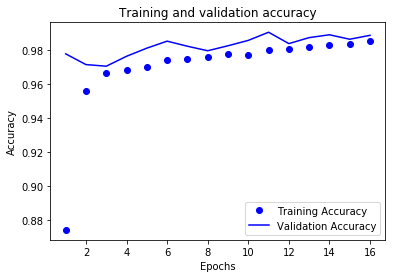

In [0]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# "b" = Blaue Linie
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()